In [11]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [12]:
plt.rcParams["figure.figsize"] = (16, 10)

## Plotting various averages over the years

In [13]:
df = pd.read_csv("data/network_metadata.tab", sep="\t", index_col="GexfID")
df.head()

,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
GexfID,,,,,,,,,,,,,
1,10 Things I Hate About You,tt0147800,1999,10-Things-I-Hate-About-You,"13,040","0,194","1,779","3,000","0,567","3,000","0,233",225,25
2,12,tt0488478,2007,12,"4,227","0,517","2,170","3,000","0,610","6,000","0,077",102,42
3,Twelve and Holding,tt0417385,2005,Twelve-and-Holding,"7,333","0,473","2,449","4,000","0,593","2,000","0,140",139,26
5,127 Hours,tt1542344,2010,127-Hours,"3,833","0,160","1,722","2,000","0,339","4,000","0,152",33,11
6,1492: Conquest of Paradise,tt0103594,1992,1492:-Conquest-of-Paradise,"7,941","0,350","2,043","4,000","0,705","1,000","0,153",164,34


### Modularity

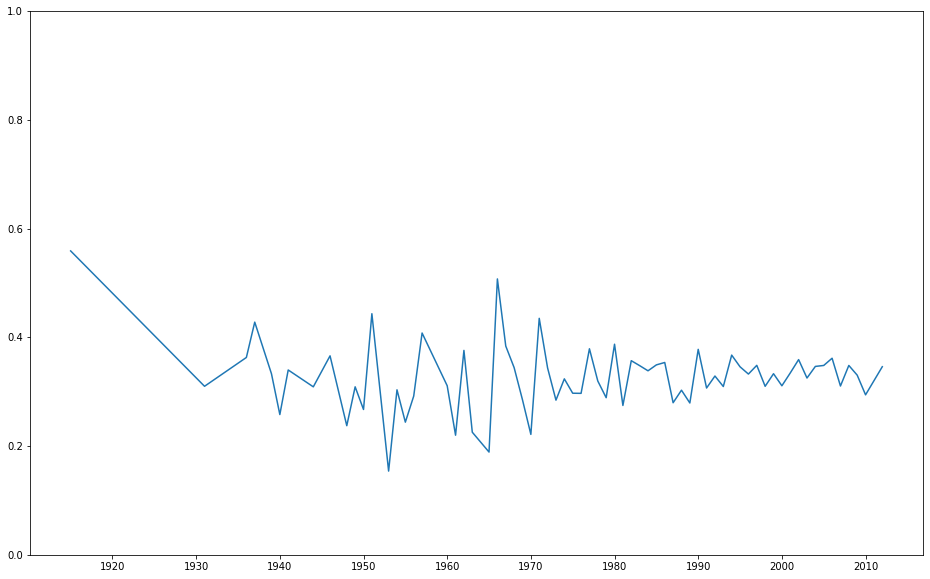

In [14]:
# Convert column values to float
df['Modularity'] = df['Modularity'].replace(',','.', regex=True).astype(float)

mod = df.sort_values('ReleaseDate').groupby('ReleaseDate')['Modularity'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(0.0,1.0)
plt.plot(mod)

### Characters

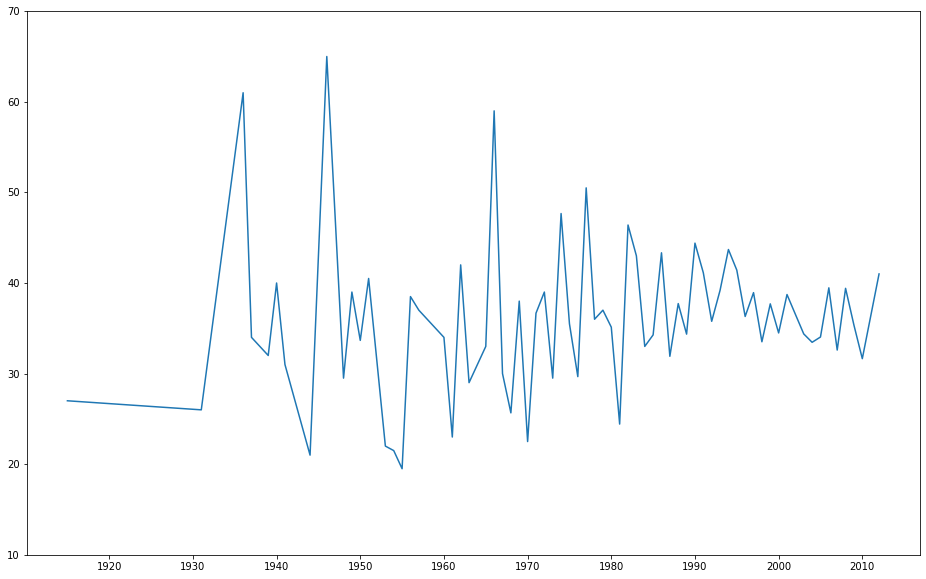

In [15]:
characters = df.groupby('ReleaseDate')['Characters'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(10,70)
plt.plot(characters)

### Graph edges

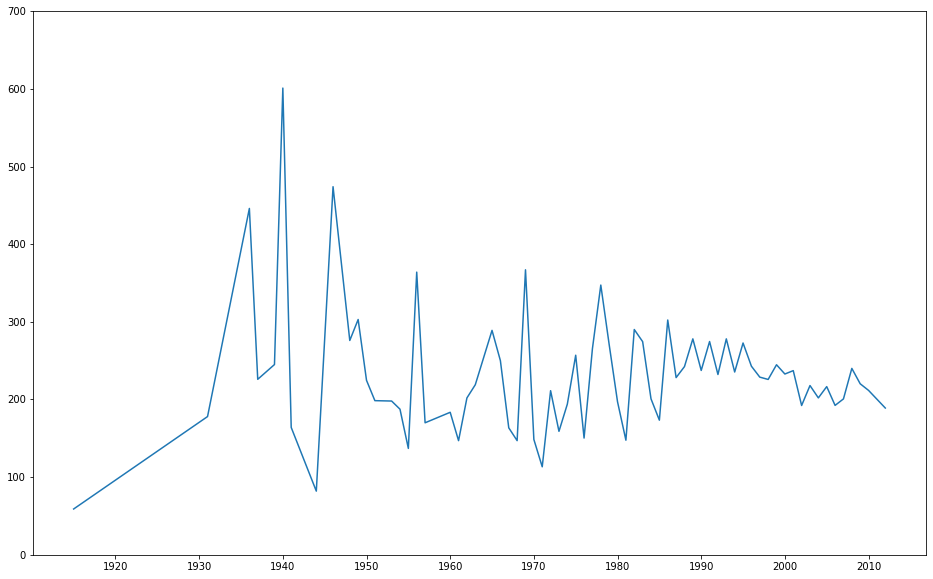

In [16]:
edges = df.groupby('ReleaseDate')['Edges'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(0,700)
plt.plot(edges)

### Clustering coefficient

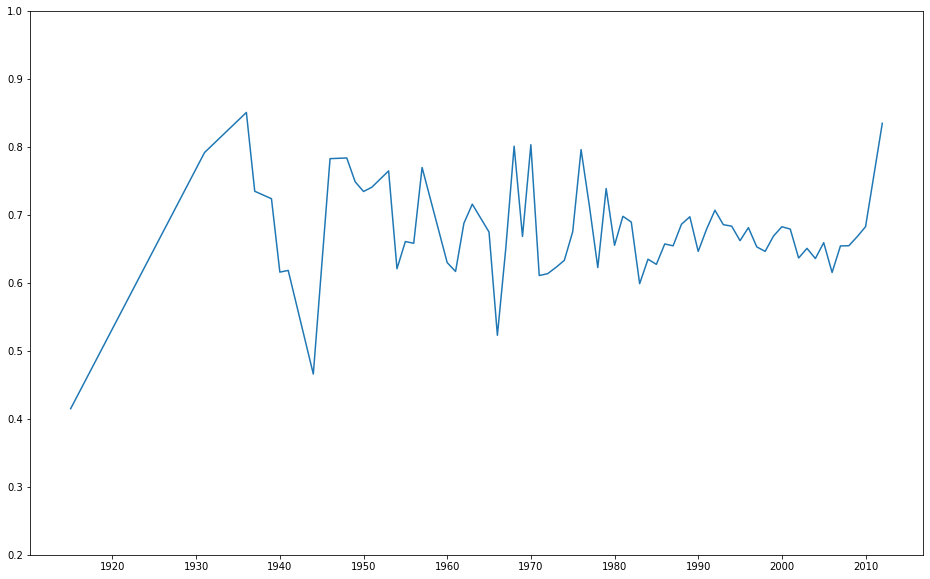

In [17]:
# Convert column values to float
df['ClusteringCoefficient'] = df['ClusteringCoefficient'].replace(',','.', regex=True).astype(float)

clustering_coefficient = df.groupby('ReleaseDate')['ClusteringCoefficient'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(0.2,1.0)
plt.plot(clustering_coefficient)

### Diameter

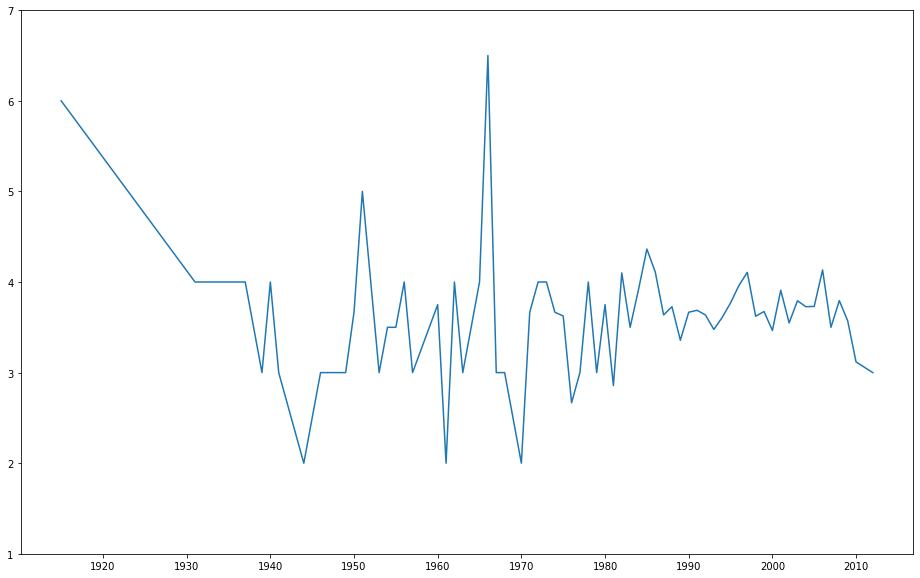

In [18]:
# Convert column values to float
df['Diameter'] = df['Diameter'].replace(',','.', regex=True).astype(float)

diameter = df.groupby('ReleaseDate')['Diameter'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(1,7)
plt.plot(diameter)

### Connected components

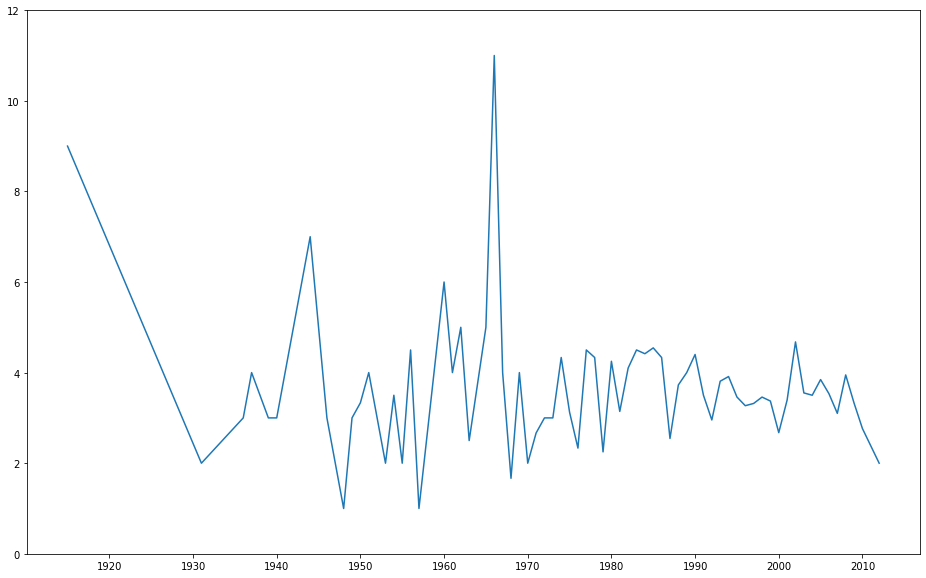

In [19]:
# Convert column values to float
df['ConnectedComponents'] = df['ConnectedComponents'].replace(',','.', regex=True).astype(float)

connected_components = df.groupby('ReleaseDate')['ConnectedComponents'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(0,12)
plt.plot(connected_components)

### Weighted degree

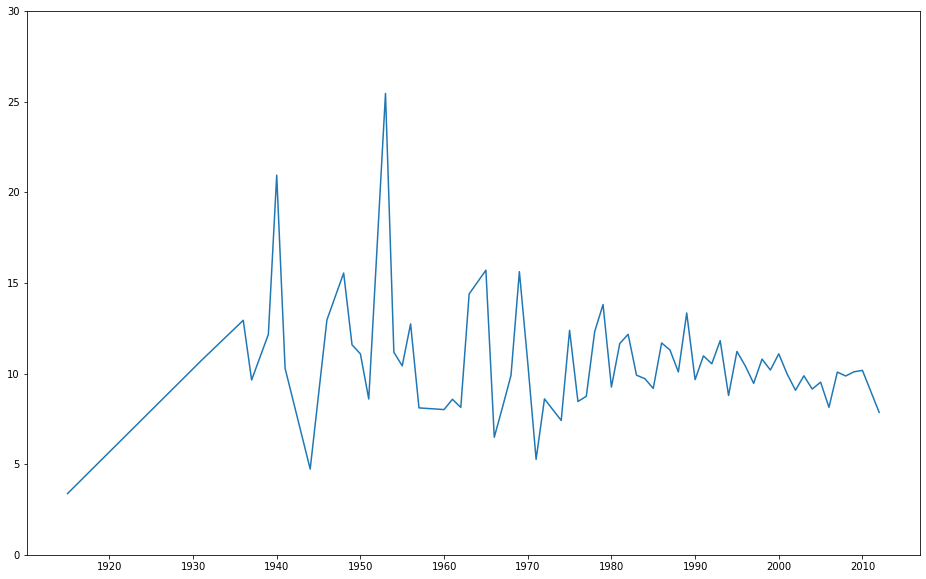

In [20]:
# Convert column values to float
df['WeightedDegree'] = df['WeightedDegree'].replace(',','.', regex=True).astype(float)

weighted_degree = df.groupby('ReleaseDate')['WeightedDegree'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(0,30)
plt.plot(weighted_degree)

### Density

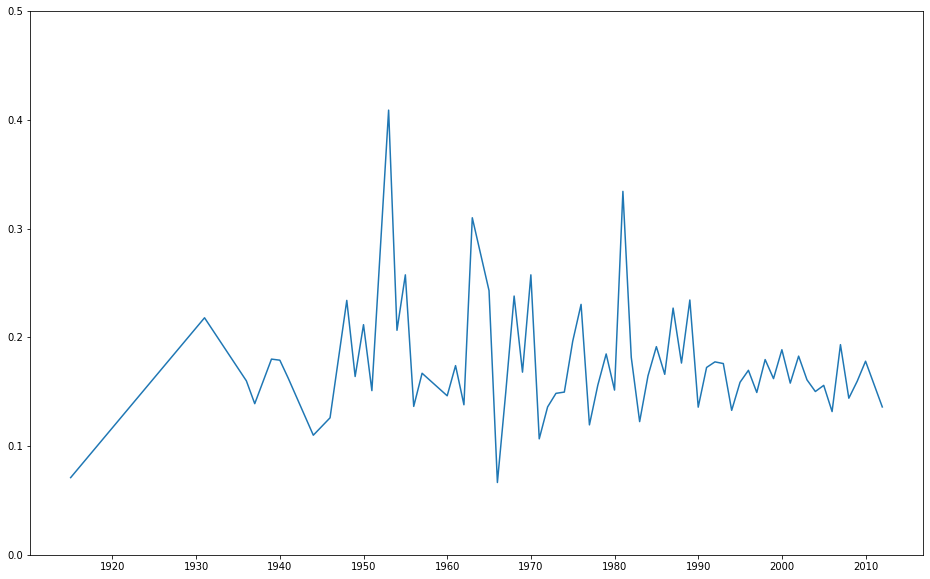

In [21]:
# Convert column values to float
df['Density'] = df['Density'].replace(',','.', regex=True).astype(float)

density = df.groupby('ReleaseDate')['Density'].agg(np.mean)
plt.xticks(np.arange(1920, 2020, step=10))
plt.ylim(0,0.5)
plt.plot(density)

## Adding IMDB ratings

In [22]:
imdb_df = pd.read_json("data/gexf_imdb_metadata.json")
imdb_df.index.name = "GexfID"
imdb_df = imdb_df.transpose()

In [23]:
merged = pd.merge(df, imdb_df, left_index=True, right_index=True)
display(merged)

,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,...,Characters,movie_id,genres,runtime_min,box_office,imdb_rating,imdb_votes,directors,writers,character_actor_mapping
GexfID,,,,,,,,,,,,,,,,,,,,,
1,10 Things I Hate About You,tt0147800,1999,10-Things-I-Hate-About-You,13.040,0.194,"1,779",3.0,0.567,3.0,...,25,147800,"[Comedy, Drama, Romance]",97,"{'Budget': '$30,000,000 (estimated)', 'Opening...",7.3,279031,[Gil Junger],"[Karen McCullah, Kirsten Smith, William Shakes...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...
2,12,tt0488478,2007,12,4.227,0.517,"2,170",3.0,0.610,6.0,...,42,488478,"[Crime, Drama, Thriller]",159,"{'Budget': '$4,000,000 (estimated)', 'Opening ...",7.7,13437,[Nikita Mikhalkov],"[Nikita Mikhalkov, Aleksandr Novototskiy-Vlaso...",{'Dochka svidetelya': {'DOC': 'Lyubov Rudneva'}}
3,Twelve and Holding,tt0417385,2005,Twelve-and-Holding,7.333,0.473,"2,449",4.0,0.593,2.0,...,26,417385,[Drama],94,"{'Budget': '$400,000 (estimated)', 'Opening We...",7.5,6550,[Michael Cuesta],[Anthony Cipriano],"{'Priest': {'PRIEST': 'Robertson Carricart'}, ..."
5,127 Hours,tt1542344,2010,127-Hours,3.833,0.160,"1,722",2.0,0.339,4.0,...,11,1542344,"[Biography, Drama]",94,"{'Budget': '$18,000,000 (estimated)', 'Opening...",7.6,333048,[Danny Boyle],"[Danny Boyle, Simon Beaufoy, Aron Ralston]","{'Aron's Mom': {'MOM': 'Kate Burton'}, 'Report..."
6,1492: Conquest of Paradise,tt0103594,1992,1492:-Conquest-of-Paradise,7.941,0.350,"2,043",4.0,0.705,1.0,...,34,103594,"[Adventure, Biography, Drama, History]",154,"{'Budget': '$47,000,000 (estimated)', 'Cumulat...",6.5,26854,[Ridley Scott],[Rose Bosch],{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Yes Man,tt1068680,2008,Yes-Man,9.143,0.351,"1,899",2.0,0.729,2.0,...,51,1068680,"[Comedy, Romance]",104,"{'Budget': '$70,000,000 (estimated)', 'Opening...",6.8,319225,[Peyton Reed],"[Nicholas Stoller, Jarrad Paul, Andrew Mogel, ...",{'Father at Homeless Shelter': {'FATHER': 'Mik...
911,You Can Count on Me,tt0203230,2000,You-Can-Count-on-Me,11.400,0.275,"1,752",3.0,0.583,4.0,...,18,203230,[Drama],111,"{'Budget': '$1,200,000 (estimated)', 'Opening ...",7.5,26652,[Kenneth Lonergan],[Kenneth Lonergan],{}
912,You've Got Mail,tt0128853,1998,You've-Got-Mail,8.769,0.374,"2,131",4.0,0.727,2.0,...,36,128853,"[Comedy, Drama, Romance]",119,"{'Budget': '$65,000,000 (estimated)', 'Opening...",6.6,183169,[Nora Ephron],"[Miklós László, Nora Ephron, Delia Ephron]",{'T.V. Reporter': {'REPORTER': 'Nina Zoie Lam'}}


### Parsing `box_office` data

In [24]:
box_office = pd.json_normalize(merged["box_office"])["Budget"].str.extract(r'(?:\$)([0-9,]+)').replace(',','', regex=True).astype(float)
box_office.index += 1
merged["Budget"] = box_office

gross = pd.json_normalize(merged["box_office"])["Cumulative Worldwide Gross"].str.extract(r'(?:\$)([0-9,]+)').replace(',','', regex=True).astype(float)
gross.index += 1
merged["Gross"] = gross

## Plotting scatterplots

### Rating vs. Nodes (characters)

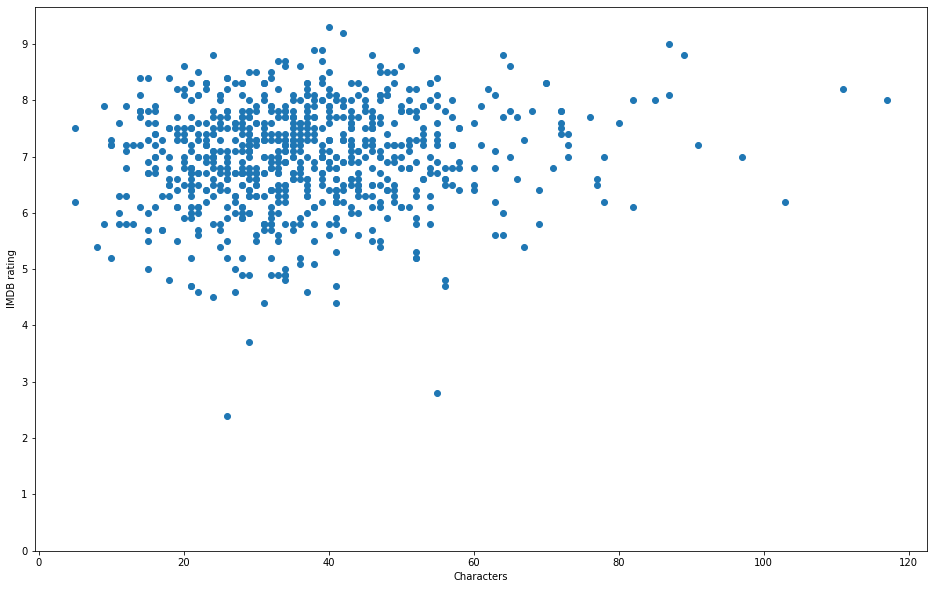

In [25]:
# Convert column values to float
merged["imdb_rating"] = merged["imdb_rating"].astype(float)

plt.scatter(merged['Characters'], merged["imdb_rating"])
plt.yticks(np.arange(0.0, 10.0, step=1.0))
plt.xlabel("Characters")
plt.ylabel("IMDB rating")
plt.show()

### Rating vs. Modularity

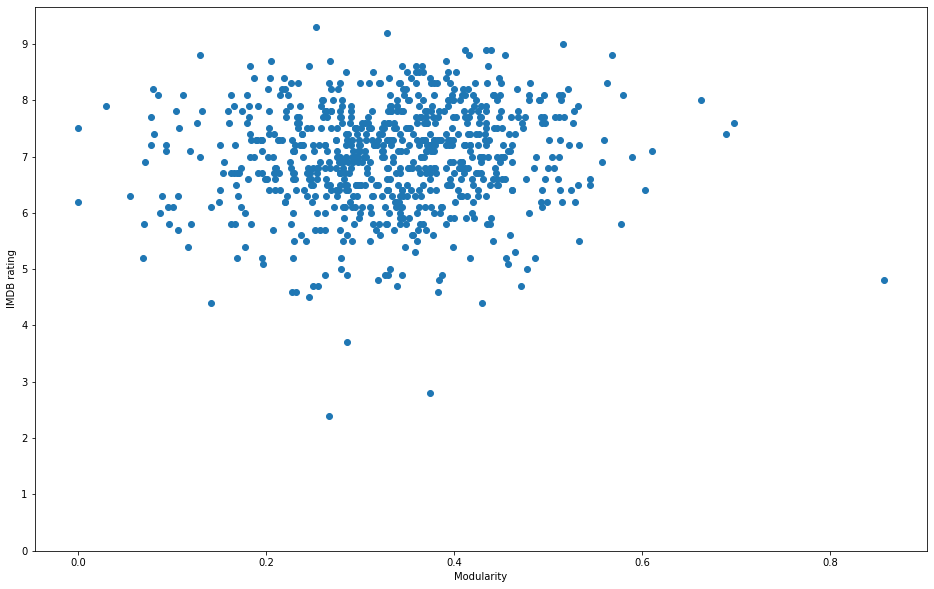

In [26]:
# Convert column values to float
merged["Modularity"] = merged["Modularity"].replace(',','.', regex=True).astype(float)

plt.scatter(merged["Modularity"], merged["imdb_rating"])
plt.yticks(np.arange(0.0, 10.0, step=1.0))
plt.xlabel("Modularity")
plt.ylabel("IMDB rating")
plt.show()

### Budget vs. Nodes (characters)

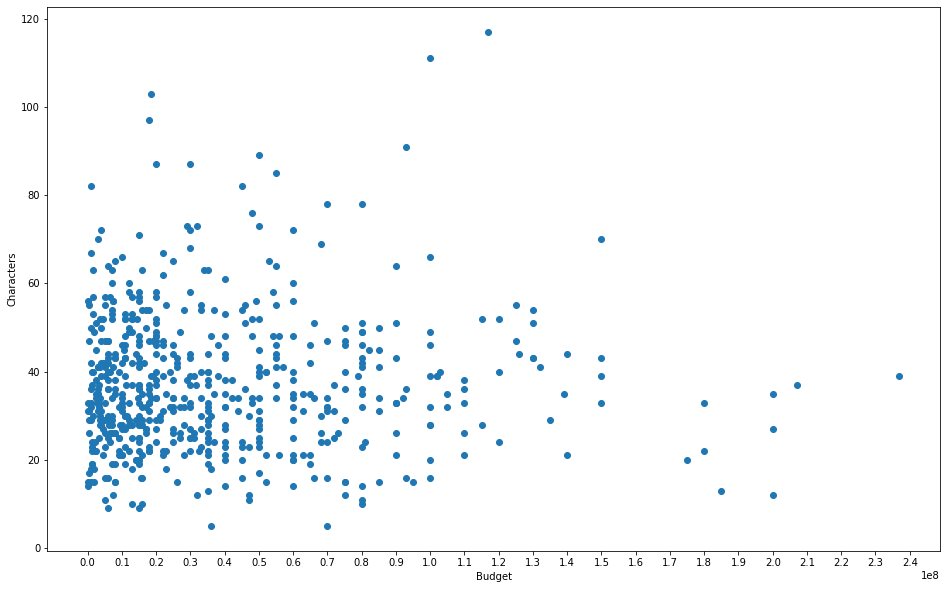

In [30]:
# Drop NaN values
budgets = merged["Budget"].dropna()
data_to_plot = pd.merge(budgets, merged["Characters"], on="GexfID", how='inner')

plt.scatter(data_to_plot["Budget"], data_to_plot["Characters"])
plt.xticks(np.arange(0, 250000000, step=10000000))
plt.xlabel("Budget")
plt.ylabel("Characters")
plt.show()

### Budget vs. Gross

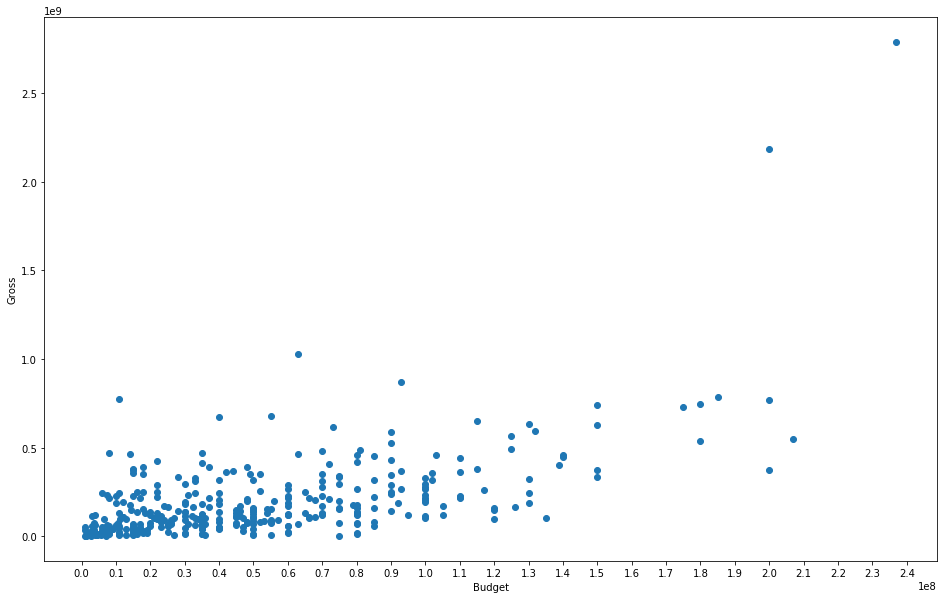

In [32]:
# Drop NaN values

budgets = merged["Budget"].dropna()
gross = merged["Gross"].dropna()
data_to_plot = pd.merge(budgets, gross, on="GexfID", how='inner')

plt.scatter(data_to_plot["Budget"], data_to_plot["Gross"])
plt.xticks(np.arange(0, 250000000, step=10000000))
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()